# Graph Analytics
There are some problems which don't neatly fall into the category of traditional "machine learning" but can still be quite powerful.   The problem we will look at today involves relationships between things which can be organized as **graphs**, and the tool we will use to investigate it is called **graph analytics** or **network analysis**.


# The "Karate Club" Network Graph.  
What is a "Network Graph"

A Network graph is a mathematical (and usually visual) structure designed to show the relations (called edges) between points (called nodes) in an aesthetically-pleasing way. The graph visualizes how subjects are interconnected with each other. Entities are displayed as nodes and the edges connecting them are displayed with lines.  Python has a number of modules designed to work with network graphs, and one of the best is called networkx.

There are a variety of interesting analyses that can be performed on a network, but one of the more interesting ones involves looking for "clustering" of subsets of nodes.   This clustering is called "community detection".

Zachary's Karate Club is a small example network included with networkx which can be used to test a number of features of graph analytics, including community detection.   See this (https://en.wikipedia.org/wiki/Zachary%27s_karate_club) for more details.

From Wikipedia:

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "Officer" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

Let's get the Karate Club network, and print out information about the nodes and edges.   We will see that the nodes have only one attribute (the club they ended up with) and the edges have no attribute, other than connecting two nodes.

Nodes could have many attributes, such as a label (in this case possibly the name of the student).

Edges could also have attributes, such as the strength of the connection between the two nodes (also called the weight).

In [1]:
import networkx as nx
import community
#
# Get the graph from networkx
gk = nx.karate_club_graph()

print("Node information:")
for node in gk.nodes():
    print(gk.nodes[node])

print()
print("Edge information:")
for u,v,data in gk.edges(data=True):
    print(u, v, data)

Node information:
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}

Edge information:
0 1 {}
0 2 {}
0 3 {}
0 4 {}
0 5 {}
0 6 {}
0 7 {}
0 8 {}
0 10 {}
0 11 {}
0 12 {}
0 13 {}
0 17 {}
0 19 {}
0 21 {}
0 31 {}
1 2 {}
1 3 {}
1 7 {}
1 13 {}
1 17 {}
1 19 {}
1 21 {}
1 30 {}
2 3 {}
2 7 {}
2 8 {}
2 9 {}
2 13 {}
2 27 {}
2 28 {}
2 32 {}
3 7 {}
3 12 {}
3 13 {}
4 6 {}
4 10 {}
5 6 {}
5 10 {}
5 16 {

# Some helper functions
These will be useful for plotting and layout of our graphs.

In [2]:
import networkx as nx
import community

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from community import community_louvain

import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import numpy as np
    
def visualize_3d(X,colors,labels,color_text='Color',label_text='Label',algorithm="tsne",title="Data in 3D"):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=3,random_state=47,n_iter=300,early_exaggeration=3.0)
    elif algorithm=="pca":
        reducer = PCA(n_components=3,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>3:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    
    colors = pd.Series(colors)
    colors = colors.apply(str)
    fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2],color=colors,labels=labels,
                        custom_data=[colors,labels],
                        color_discrete_sequence=px.colors.qualitative.Dark24,
                        size_max=5.0)
    fig.update_traces(marker={'size': 3})
    fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
    fig.update_traces(hovertemplate=color_text+':%{customdata[0]}<br>'+label_text+':%{customdata[1]}') #
    fig.show()
    
    
    
def visualize_2d(X,colors,labels,color_text='Color',label_text='Label',algorithm="tsne",title="Data in 2D"):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=300,early_exaggeration=3.0)

    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>2:
        print("transforming")
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    
    colors = pd.Series(colors)
    colors = colors.apply(str)
    fig = px.scatter(x=X[:,0], y=X[:,1],color=colors,labels=labels,
                     custom_data=[colors,labels],
                        color_discrete_sequence=px.colors.qualitative.Dark24,
                       size_max=5.0)
    fig.update_traces(marker={'size': 3})
    fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
    fig.update_traces(hovertemplate=color_text+':%{customdata[0]}<br>'+label_text+':%{customdata[1]}') #
    fig.show()

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """
#
# The scale parameter controls how far apart the clusters are
    pos_communities = _position_communities(g, partition, scale=5.)

# The scale parameter controls how far apart the nodes are
    pos_nodes = _position_nodes(g, partition, scale=0.4)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    
    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g, resolution=1.5)
    print("Number of found communities",len(set(partition.values())))
    pos = community_layout(g, partition)
    values = [partition.get(node) for node in g.nodes()]
    nx.draw(g, pos, node_color=values)
    plt.show()
    return

# Community Detection
Once a network is made, a simple way to look for structure is to see if subsets of the nodes cluster together.   

One of the best tools for this is "louvain community detection" (https://perso.uclouvain.be/vincent.blondel/research/louvain.html).

There is a resollution parameter which controls how many clusters are typically found.   The default is 1.0.   Smaller numbers yield more clusters, while larger numbers yield fewer clusters.

Number of found communities 2


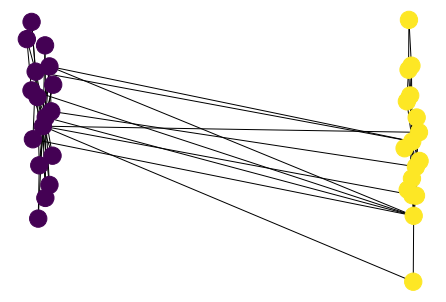

In [3]:
#
# Do community detection
partition_gk = community_louvain.best_partition(gk, resolution=1.5)
print("Number of found communities",len(set(partition_gk.values())))
#
# Layout the network so that the communities are clustered
pos = community_layout(gk, partition_gk)
xpos = []
community = []
label = []
for node in gk.nodes():
    community.append(partition_gk.get(node))
    xpos.append(pos[node])
    label.append(gk.nodes[node]['club'])
xpos = np.asarray(xpos, dtype=np.float32)
#
# Now draw
nx.draw(gk, pos, node_color=community)
plt.show()
# 
# Visualize using plotly
visualize_2d(xpos,colors=community,labels=label,color_text='Found Community',label_text='True Cbub',title="Karate Network")

# A more fun network: Marvel Comic Book Characters!

![marvel](The_Marvel_Universe.png)

This network is not included with networkx - we have to build it ourselves.

To do this, we will use a file containing a list of comic books and the "heroes" that appear in them.   This dataset is from https://www.kaggle.com/csanhueza/the-marvel-universe-social-network.

The data is lines containing "hero" and "comic book".   
* The nodes will be "heroes" (or major characters that appear in each comic)
* The edges will be the number of times a pair of characters appoears in the same comic book.

In [4]:

import pandas as pd
heroes_comics = pd.read_csv('heroes_comics.csv')
print(heroes_comics.head(50))

                    hero     comic
0   24-HOUR MAN/EMMANUEL    AA2 35
1   3-D MAN/CHARLES CHAN     AVF 4
2   3-D MAN/CHARLES CHAN     AVF 5
3   3-D MAN/CHARLES CHAN     COC 1
4   3-D MAN/CHARLES CHAN    H2 251
5   3-D MAN/CHARLES CHAN    H2 252
6   3-D MAN/CHARLES CHAN  M/PRM 35
7   3-D MAN/CHARLES CHAN  M/PRM 36
8   3-D MAN/CHARLES CHAN  M/PRM 37
9   3-D MAN/CHARLES CHAN     WI? 9
10      4-D MAN/MERCURIO    CA3 36
11      4-D MAN/MERCURIO     CM 51
12      4-D MAN/MERCURIO      Q 14
13      4-D MAN/MERCURIO      Q 16
14      4-D MAN/MERCURIO     T 208
15      4-D MAN/MERCURIO     T 214
16      4-D MAN/MERCURIO     T 215
17      4-D MAN/MERCURIO     T 216
18      4-D MAN/MERCURIO     T 440
19               8-BALL/   SLEEP 1
20               8-BALL/  SLEEP 19
21               8-BALL/   SLEEP 2
22          ABBOTT, JACK   DD/SM 1
23               ABCISSA     W2 52
24               ABCISSA     W2 53
25                  ABEL  XFOR 108
26                  ABEL  XFOR 109
27  ABOMINATION/EMIL

# Forming Links
To link heroes, we will loop over the above dataframe, and do the following:
* Count how often each hero appears
* Keep track of which heroes appear in each individual comic book

Once we have the data for each comic book, we can loop over the comic books and link heroes by the common comic books they appear in.

In [5]:
from collections import defaultdict
from functools import partial
from itertools import repeat
def nested_defaultdict(default_factory, depth=1):
    result = partial(defaultdict, default_factory)
    for _ in repeat(None, depth - 1):
        result = partial(defaultdict, result)
    return result()

from itertools import combinations 
  
#
# Loop over dataframe, and for each comic, store all of the heroes that appear in that comic
comicHeroList = defaultdict(list)
heroCount = defaultdict(int)
for index, row in heroes_comics.iterrows():
    hero = row['hero']
    comic = row['comic']
    heroCount[hero] += 1
    comicHeroList[comic].append(hero)
#
# Now loop over comics, and count how often heroes show up together
heroPairCount = nested_defaultdict(int,2)
for comic in comicHeroList:
    combos = combinations(comicHeroList[comic],2)
    for (h1,h2) in combos:
        heroPairCount[h1][h2] += 1
        heroPairCount[h2][h1] += 1


# Some printout
Now lets print out the most common hero by count, and then for each of these, print out who they appear together with the most often.

In [6]:
for hero in sorted(heroCount, key=heroCount.get, reverse=True)[:10]:
    print("Hero: ",hero,"; comic count ",heroCount[hero])
    for hero2 in sorted(heroPairCount[hero], key=heroPairCount[hero].get, reverse=True)[:10]:
        print("   appears with ",hero2,"; number comics ",heroPairCount[hero][hero2])


Hero:  SPIDER-MAN/PETER PARKER ; comic count  1577
   appears with  WATSON-PARKER, MARY ; number comics  614
   appears with  JAMESON, J. JONAH ; number comics  514
   appears with  PARKER, MAY ; number comics  371
   appears with  ROBERTSON, JOE ; number comics  355
   appears with  LEEDS, BETTY BRANT ; number comics  246
   appears with  THOMPSON, EUGENE FLA ; number comics  238
   appears with  OSBORN, HARRY ; number comics  181
   appears with  HUMAN TORCH/JOHNNY S ; number comics  147
   appears with  CAPTAIN AMERICA ; number comics  145
   appears with  OSBORN, LIZ ALLAN ; number comics  137
Hero:  CAPTAIN AMERICA ; comic count  1334
   appears with  IRON MAN/TONY STARK ; number comics  440
   appears with  VISION ; number comics  385
   appears with  THOR/DR. DONALD BLAK ; number comics  380
   appears with  WASP/JANET VAN DYNE ; number comics  376
   appears with  SCARLET WITCH/WANDA ; number comics  373
   appears with  HAWK ; number comics  319
   appears with  ANT-MAN/DR. HE

# Another way to view the data
The tables above are interesting, but it is a little difficult to tell if all of the heroes are just randomnly connected, or if there is some structure to these connections.

As with the Karate network above, we can learn some interesting thing about the relationships among our heroes if we form them into a network.  Our network will have (at least) two primary features:
* Nodes:  These are the primary "objects" in our network, and they are somewhat dependent on the problem you are dealing with.   In this case, each "hero" will be a node.  The size or weight of the node will be its total count.
* Edges:  These are the connections between the nodes.   In our case, the edges are the defined by common comic books the heroes appear in.   If two heros appear together in at least one commic book, there will be a single edge between them.  The weight of that edge will be the count of these common appearances.


In [7]:

# Now look for communities
G = nx.Graph()

nodeCountCut = 50.0   
edgeCut = 25.0

#
# Now find edges that connect good nodes
numEdges = 0
numGoodEdges = 0
goodEdgeNodes = set()
nodeEdgeCount = defaultdict(int)
for index1 in heroPairCount:
    for index2 in heroPairCount[index1]:
        if index1 != index2:
            numEdges += 1
            if heroPairCount[index1][index2] > edgeCut:
                numGoodEdges += 1
                G.add_edge(index1, index2, weight=heroPairCount[index1][index2])
                goodEdgeNodes.add(index1)
                goodEdgeNodes.add(index2)
                nodeEdgeCount[index1] += 1
                nodeEdgeCount[index2] += 1

#
# Next add to graph only those nodes that actually have at least one connection!
numNodes = 0
numGoodNodes = 0
for hero in heroCount:
    if hero in goodEdgeNodes:
        G.add_node(hero,weight=heroCount[hero],hero=hero)
        numNodes += 1
        if nodeEdgeCount[hero]>0:
            numGoodNodes += 1

print("Total number all nodes  ",numNodes)
print("Total number passing cuts nodes ",numGoodNodes)
print("Total number all edges ",numEdges)
print("Total number good edges ",numGoodEdges)




Total number all nodes   478
Total number passing cuts nodes  478
Total number all edges  343288
Total number good edges  4878


In [8]:
#first compute the best partition
# The smaller "resolution" is the more communities you get
resolution = 1.0
partition = community_louvain.best_partition(G,weight='weight', resolution=resolution)
print("Number of found communities",len(set(partition.values())))

Number of found communities 26


# Form Lookup Tables
The following shows how to connect the found communities to the original list of heroes.

The resulting tables of the largest hero communities and their members are printed, and the results look really sensible!!

In [9]:
communityList = defaultdict(list)
communityCount = defaultdict(int)
communityHeroCount = nested_defaultdict(int,2)
for communityID,hero in zip(partition.values(),partition.keys()):
#    print("communityID ",communityID,"; communityIndex ",hero)
    communityList[communityID].append(hero)
    communityCount[communityID] += 1
    communityHeroCount[communityID][hero] = heroCount[hero]

for communityID in sorted(communityCount, key=communityCount.get, reverse=True)[:10]:
    print("Community ID ",communityID,"; number of members ",communityCount[communityID])
    for hero in sorted(communityHeroCount[communityID], key=communityHeroCount[communityID].get, reverse=True)[:10]:
        print("   hero ",hero,"count ",communityHeroCount[communityID][hero])



Community ID  21 ; number of members  90
   hero  WOLVERINE/LOGAN count  819
   hero  BEAST/HENRY &HANK& P count  635
   hero  CYCLOPS/SCOTT SUMMER count  585
   hero  STORM/ORORO MUNROE S count  523
   hero  PROFESSOR X/CHARLES count  496
   hero  MARVEL GIRL/JEAN GRE count  466
   hero  COLOSSUS II/PETER RA count  452
   hero  ANGEL/WARREN KENNETH count  444
   hero  NIGHTCRAWLER/KURT WA count  444
   hero  ICEMAN/ROBERT BOBBY count  427
Community ID  5 ; number of members  88
   hero  CAPTAIN AMERICA count  1334
   hero  IRON MAN/TONY STARK count  1150
   hero  SCARLET WITCH/WANDA count  643
   hero  HAWK count  605
   hero  VISION count  603
   hero  WASP/JANET VAN DYNE count  581
   hero  ANT-MAN/DR. HENRY J. count  561
   hero  FURY, COL. NICHOLAS count  471
   hero  SHE-HULK/JENNIFER WA count  415
   hero  JARVIS, EDWIN count  399
Community ID  9 ; number of members  68
   hero  SPIDER-MAN/PETER PARKER count  1577
   hero  WATSON-PARKER, MARY count  622
   hero  DAREDEVIL/MATT M

# Drawing the Marvel Network
Now lets use the same tool to draw our network.

Number of found communities 23
{'weight': 561, 'hero': 'ANT-MAN/DR. HENRY J.'}
{'weight': 1334, 'hero': 'CAPTAIN AMERICA'}
{'weight': 605, 'hero': 'HAWK'}
{'weight': 322, 'hero': 'JONES, RICHARD MILHO'}
{'weight': 581, 'hero': 'WASP/JANET VAN DYNE'}
{'weight': 102, 'hero': 'PHARAOH RAMA-TUT'}
{'weight': 1150, 'hero': 'IRON MAN/TONY STARK'}
{'weight': 174, 'hero': 'MOCKINGBIRD/DR. BARB'}
{'weight': 390, 'hero': 'WONDER MAN/SIMON WIL'}
{'weight': 384, 'hero': 'BLACK WIDOW/NATASHA'}
{'weight': 262, 'hero': 'CRYSTAL [INHUMAN]'}
{'weight': 353, 'hero': 'HERCULES [GREEK GOD]'}
{'weight': 415, 'hero': 'SHE-HULK/JENNIFER WA'}
{'weight': 603, 'hero': 'VISION'}
{'weight': 318, 'hero': "BLACK PANTHER/T'CHAL"}
{'weight': 399, 'hero': 'JARVIS, EDWIN'}
{'weight': 631, 'hero': 'DR. STRANGE/STEPHEN'}
{'weight': 835, 'hero': 'HULK/DR. ROBERT BRUC'}
{'weight': 886, 'hero': 'HUMAN TORCH/JOHNNY S'}
{'weight': 854, 'hero': 'MR. FANTASTIC/REED R'}
{'weight': 643, 'hero': 'SCARLET WITCH/WANDA'}
{'weight': 53

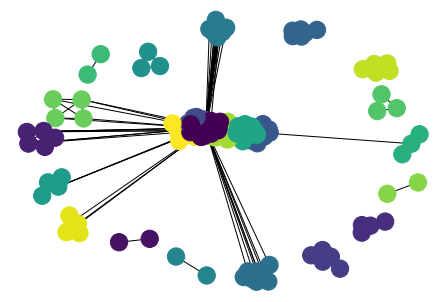

In [10]:

#
# Do community detection
partition = community_louvain.best_partition(G, resolution=1.5)
print("Number of found communities",len(set(partition.values())))
#
# Layout the network so that the communities are clustered
pos = community_layout(G, partition)
values = [partition.get(node) for node in G.nodes()]

xpos = []
community = []
label = []
for node in G.nodes():
    print(G.nodes[node])
    community.append(partition.get(node))
    xpos.append(pos[node])
    label.append(G.nodes[node]['hero'])
xpos = np.asarray(xpos, dtype=np.float32)
#
# Now draw
nx.draw(G, pos, node_color=values)
#nx.draw(G, pos, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False, font_size=6)

plt.show()

visualize_2d(xpos,colors=community,labels=label,color_text='Community',label_text='Hero',title="Karate Network")

## Application of graph analytics to real-world numerical datasets
The above analysis is interesting, but there are not many problems which we will encounter in a typical analysis environment which are like the above Marvel Universe.   It is reasonable to ask if these tools might be applicable in other circumstances.

The idea of community detection seems like one that might have such broader application.   Community detction is just a form of clustering, which itself is an example of "unsupervised" learning.   Can we use community detection in a real work example?  The answer is yes.

To do this we will use "fake" datasets (generated using sklearn tools), as well as some helper functions in the code block below.  The helper fucntions will allow us to visualize the generated datasets.

## Generating Fake Data
sklearn comes with a powerful tool for generating datasets call "make_classification".   The resulting generated datasets can then be used to test other algorithms such as classification and regression.   We will use this to test the clustering ability of graph analytics algorithms.

The important parameters for "make_classification" are the following:
* n_samples: this is the total amount of data you want generated.  We will generate 1000 data points.
* n_classes: the total number of different classes you want your data to have.   We will generate 4 classes.
* n_features: the total number of features that describe each data point in your sample.   Our data will have 10 features.   So this is a "10-dimensional space".
* class_sep: the larger this value, the more your classes are separated (and presumably the easier they are to classify or cluster).


In [11]:
from sklearn.datasets import make_classification
import pandas as pd
X,Y = make_classification(n_samples=1000, n_features=10,
                    n_redundant=1, n_repeated=0, n_classes=4, n_clusters_per_class=1,
                    class_sep=2.0,
                   flip_y=0)
Xd = pd.DataFrame(X)
Yd = pd.Series(Y)
print(Xd)


            0         1         2         3         4         5         6  \
0    1.359535  0.464795 -0.053798  0.369262 -0.044798 -2.152139 -1.155315   
1    0.103109  0.734970 -0.451676  0.182308 -0.310400  2.635645  0.766861   
2    1.818586  0.954591  0.158701 -2.564483 -0.254704 -1.580301 -1.151705   
3    0.220463 -1.998717 -0.959936  1.760293  0.566426  1.507623 -0.037483   
4    2.898046 -1.388416 -1.042000 -1.055744 -0.575806 -0.756992  0.728297   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.095808  1.390119  0.082220 -0.949850  0.137168 -1.042716 -0.286036   
996  0.516732 -2.935709 -1.188293 -0.531739  0.685456  2.661871  1.210939   
997  1.979105  1.337773  0.726912  0.280291  0.398967 -2.290153  0.763525   
998 -0.502896  3.773463  0.414188  1.333357  2.780392 -2.864771  0.153753   
999 -0.001274  1.065130  1.839870  0.293900 -0.699497  1.393639  0.975563   

            7         8         9  
0    0.004498  0.328634 -0.586413  
1  

# Number of data points per class

In [12]:

from collections import defaultdict
from functools import partial
from itertools import repeat
def nested_defaultdict(default_factory, depth=1):
    result = partial(defaultdict, default_factory)
    for _ in repeat(None, depth - 1):
        result = partial(defaultdict, result)
    return result()

#
# Loop over the classes we generated above and see how many we have in each
classNums = defaultdict(int)
for y in Y:
    classNums[y] += 1
print("Class numbers ",classNums)


Class numbers  defaultdict(<class 'int'>, {0: 250, 3: 250, 2: 250, 1: 250})


# Visualization of High Dimensional Data Using t-sne
Our data has 10 dimensions (from the 10 features we generated it with).  How do we visualize it?  We could make a network of this data (and we will do that below) and then do community detection and plot the resulting network as we did above.   Instead, we will use a methoid called t-sne, to project our 10 dimensions down to 2 or 3.

From Wikipedia:

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It is based on Stochastic Neighbor Embedding originally developed by Sam Roweis and Geoffrey Hinton,[1] where Laurens van der Maaten proposed the t-distributed variant.[2] It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

Our "visualize_3d" and "visualize_2d" functions **already** incorporate t-sne, if the dimension given to them are aove 3 or 2 respectively.   We will see that our 4 generated samples appear as 4-separate clusters aftyer the application of t-sne.

In [13]:
visualize_3d(Xd,Yd,Yd)

# Edges
We need some way to define edges, in oprder to be able to connect our datapoints.   To do this, we will use a concept we introduced previously: **cosine similarity**.   Our points each lie in an n-dimensional space (defined by the features).   By calculating the cosine between each point, we can define a strength of the connection:
* if the cosine>threshold then the points are connected
* if the cosing<threshold, then the points are not connected

We are assuming that since the data is generated to come from different classes, that the cosine of points ffrom the same classes should be closer than points from different classes.

In [14]:

from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

simSame = []
simDifferent = []


labels = []
index = 0
for y in Y:
    labels.append(index)
    index += 1

edges = nested_defaultdict(float,2)
for x1,y1,index1 in zip(X,Y,labels):
    for x2,y2,index2 in zip(X,Y,labels):
        if index2>index1:
            sim = cosine_similarity(x1,x2)
            edges[index1][index2] = sim
            edges[index2][index1] = sim
            if y1==y2:
                simSame.append(sim)
            else:
                simDifferent.append(sim)



# Compare cosine similarity for points
Look at points of the same class, versus points of different classes.

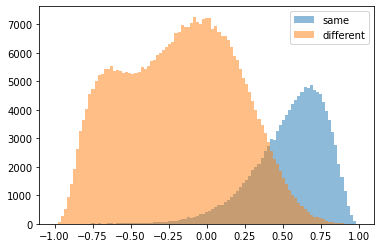

In [15]:
from matplotlib import pyplot
import numpy as np

bins = np.linspace(-1, 1, 100)

pyplot.hist(simSame, bins, alpha=0.5, label='same')
pyplot.hist(simDifferent, bins, alpha=0.5, label='different')
pyplot.legend(loc='upper right')
pyplot.show()

# Define the connections
From the curve above, it looks like we can call connected points, those that have cosine>0.5.

With this definition, we can form a graph.
* Edges are nodes with have cosine>threshold (which we set to be 0.5)
* Nodes are those which have at least some threshold of connections (we will use 5)

In [16]:

import networkx as nx
import community

# Now look for communities
G = nx.Graph()

nodeCountCut = 5.0
edgeCut = 0.5

#
# Now find edges that connect good nodes
numEdges = 0
numGoodEdges = 0
goodEdgeNodes = set()
nodeEdgeCount = defaultdict(int)
for index1 in edges:
    for index2 in edges[index1]:
        if index1 != index2:
            numEdges += 1
            if edges[index1][index2] > edgeCut:
                numGoodEdges += 1
                G.add_edge(index1, index2, weight=edges[index1][index2])
                goodEdgeNodes.add(index1)
                goodEdgeNodes.add(index2)
                nodeEdgeCount[index1] += 1
                nodeEdgeCount[index2] += 1

#
# Next add to graph only those nodes that actually have at least one connection!
numNodes = 0
numGoodNodes = 0
for x,y,index in zip(X,Y,labels):
#    print(y,index)
    G.add_node(index,weight=nodeEdgeCount[index],trueclass=y,nodenum=index)
    numNodes += 1
    if nodeEdgeCount[index]>0:
        numGoodNodes += 1

print("Total number all nodes  ",numNodes)
print("Total number passing cuts nodes ",numGoodNodes)
print("Total number all edges ",numEdges)
print("Total number good edges ",numGoodEdges)




Total number all nodes   1000
Total number passing cuts nodes  1000
Total number all edges  999000
Total number good edges  179344


# Run Community Detection

In [17]:
#first compute the best partition
# The smaller "resolution" is the more communities you get
resolution = 1.0
partition = community.best_partition(G,weight='weight', resolution=resolution)
print("Number of found communities",len(set(partition.values())))


Number of found communities 4


# Connect Communities to Classes
The found communities are the same as the number of classes.   Remember: this was totally unsupervised!   Now we need to see if the communities actually correspond to the true classes.

This is a little more complicated than the marvel universe.  In our case, each point already belongs to a class, and we want to know how often our classes are connected to the same community.

assigning indices


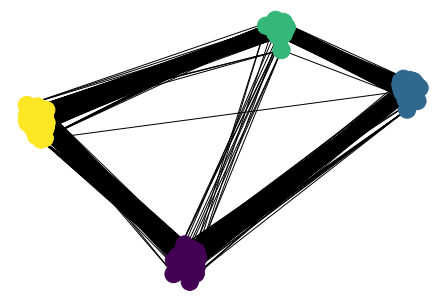

transforming


In [18]:
#
# Layout the network so that the communities are clustered
pos = community_layout(G, partition)
xpos = []
community_color = []
label = []
index_list = []
community_by_index = {}
for node in G.nodes():
    community_color.append(partition.get(node))
    xpos.append(pos[node])
    label.append(G.nodes[node]['trueclass'])
    index = G.nodes[node]['nodenum']
    community_by_index[index]=partition.get(node)

community_by_index_list = []
print("assigning indices")
for index in range(len(Xd)):
    if index in community_by_index:
        community_by_index_list.append( community_by_index[index])
    else:
        community_by_index_list.append(-1)
                   
xpos = np.asarray(xpos, dtype=np.float32)
#
# Now draw
nx.draw(G, pos, node_color=community_color)
plt.show()
# 
# Visualize using plotly but NOT using network layout - using t-sne
visualize_2d(Xd,colors=community_by_index_list,labels=Yd,color_text='Found Community',label_text='True Class',title="Fake Data")

# Assignment
Now let's apply this to a data sample we used previously: pulsars.   What I want you to do is to 
1. Calculate the cosine similarity among all points in the pulsar dataset
2. Plot the cosine similary for true pulsars (one class) vs non-pulsars (the other class).
3. Plot the 3D visualization using TSNE.
4. Run community detection and determine how many communities are found.

An extra credit portion will deal with mathing found communities to true classes.

The code below sets things up by reading the data in!

In [19]:
import pandas as pd

#
# Read in all of the other digits
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/HTRU2/HTRU_2a.csv'
dfAll = pd.read_csv(fname)
print(dfAll.head(5))
#
# The data already has a 0/1 class variable that defines signal (1) and background (0)
#
# The data is already combined but it will be usefull to split it so we can look at 
# signal and background separately.
dfA = dfAll[dfAll['class']==1]
dfB = dfAll[dfAll['class']==0]

print("Length of signal sample:     ",len(dfA))
print("Length of background sample: ",len(dfB))

#
# Shuffle the data here
from sklearn.utils import shuffle
dfBShuffle = shuffle(dfB)
#
# Uncomment the next line to limit dfB to be the same length as dfA
#dfB_use = dfBShuffle
dfB_use = dfBShuffle.head(len(dfA))


dfCombined = dfB_use
dfCombined = pd.concat([dfCombined, dfA])
dfCombined = shuffle(dfCombined)

print("Size of signal sample ",len(dfA))
print("Size of background sample ",len(dfB_use))
print("Size of combined sample ",len(dfCombined))

from sklearn.utils import shuffle
dfCombinedShuffle = shuffle(dfCombined,random_state=42)    # by setting the random state we will get reproducible results

X = dfCombinedShuffle.iloc[:,:8].to_numpy()
Y = dfCombinedShuffle['class'].values



   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0  
Length of signal sample:      1639
Length of background sample:  16259
Size of signal sample  1639
Size of background sample  1639
Size of combined sample  3278


# Assignment Task 1
Calculate the cosine similarity between all of the data points in the pulsar dataset.  This is done almost exactly like we did above for our fake dataset.

In [20]:
# your code here

from numpy import dot
from numpy.linalg import norm

simSame = []
simDifferent = []


labels = []
index = 0
for y in Y:
    labels.append(index)
    index += 1

edges = nested_defaultdict(float,2)
for x1,y1,index1 in zip(X,Y,labels):
    for x2,y2,index2 in zip(X,Y,labels):
        if index2>index1:
            sim = cosine_similarity(x1,x2)
            edges[index1][index2] = sim
            edges[index2][index1] = sim
            if y1==y2:
                simSame.append(sim)
            else:
                simDifferent.append(sim)

# Assignment Task 2
Plot the cosine similarity of the signal vs background datasets.

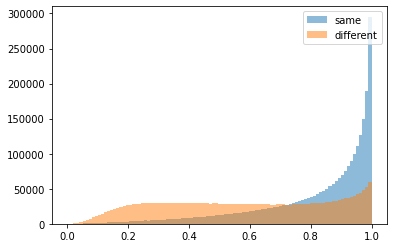

In [21]:
# your code here
from matplotlib import pyplot
import numpy as np

bins = np.linspace(0, 1, 100)

pyplot.hist(simSame, bins, alpha=0.5, label='same')
pyplot.hist(simDifferent, bins, alpha=0.5, label='different')
pyplot.legend(loc='upper right')
pyplot.show()

# Assignment Task 3
Plot the 3D visualization using TSNE (using visualize_3d).   This might take awhile since there are alot of points to plot.

In [22]:
visualize_3d(X,Y,Y)

/fs/ess/PAS2038/PHYSICS5680_OSU/jupyter/lib64/python3.6/site-packages/plotly/express/_core.py:137: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



# Assignment Task 4: Run Community Detection
Run community detection on the pulsar dataset.   Use a cut of 0.9 on cosine similarity, and see how many communities you get.  Remember that this is an unsupervised task - the community detection algorithm does not know how many classes are in the same.

Make sure you print out how many classes are found.

In [23]:
import networkx as nx
import community

# Now look for communities
G = nx.Graph()

nodeCountCut = 5.0
edgeCut = 0.9

#
# Now find edges that connect good nodes
numEdges = 0
numGoodEdges = 0
goodEdgeNodes = set()
nodeEdgeCount = defaultdict(int)
for index1 in edges:
    for index2 in edges[index1]:
        if index1 != index2:
            numEdges += 1
            if edges[index1][index2] > edgeCut:
                numGoodEdges += 1
                G.add_edge(index1, index2, weight=edges[index1][index2])
                goodEdgeNodes.add(index1)
                goodEdgeNodes.add(index2)
                nodeEdgeCount[index1] += 1
                nodeEdgeCount[index2] += 1

#
# Next add to graph only those nodes that actually have at least one connection!
numNodes = 0
numGoodNodes = 0
for x,y,index in zip(X,Y,labels):
#    print(y,index)
    G.add_node(index,weight=nodeEdgeCount[index],trueclass=y,nodenum=index)
    numNodes += 1
    if nodeEdgeCount[index]>0:
        numGoodNodes += 1

print("Total number all nodes  ",numNodes)
print("Total number passing cuts nodes ",numGoodNodes)
print("Total number all edges ",numEdges)
print("Total number good edges ",numGoodEdges)




Total number all nodes   3278
Total number passing cuts nodes  3278
Total number all edges  10742006
Total number good edges  3423314


In [24]:
#first compute the best partition
# The smaller "resolution" is the more communities you get
resolution = 1.0
partition = community.best_partition(G,weight='weight', resolution=resolution)
print("Number of found communities",len(set(partition.values())))


Number of found communities 3


In [25]:
#
# Layout the network so that the communities are clustered
pos = community_layout(G, partition)
xpos = []
community_color = []
label = []
index_list = []
community_by_index = {}
for node in G.nodes():
    community_color.append(partition.get(node))
    xpos.append(pos[node])
    label.append(G.nodes[node]['trueclass'])
    index = G.nodes[node]['nodenum']
    community_by_index[index]=partition.get(node)

community_by_index_list = []
print("assigning indices")
for index in range(len(X)):
    if index in community_by_index:
        community_by_index_list.append( community_by_index[index])
    else:
        community_by_index_list.append(-1)
                   
xpos = np.asarray(xpos, dtype=np.float32)


assigning indices


In [26]:
# xpos = []
# community_color = []
# label = []
# index_list = []
# community_by_index = {}
print(np.shape(xpos))
print(np.shape(community_color))
print(np.shape(label))
print(np.shape(index_list))
print(np.shape(community_by_index))

(3278, 2)
(3278,)
(3278,)
(0,)
()


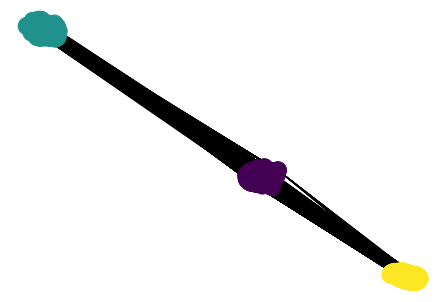

In [27]:
# Now draw
nx.draw(G, pos, node_color=community_color)
plt.show()

In [28]:
# Visualize using plotly but NOT using network layout - using t-sne
visualize_2d(X,colors=community_by_index_list,labels=Y,color_text='Found Community',label_text='True Class',title="Pulsar Data")

transforming


/fs/ess/PAS2038/PHYSICS5680_OSU/jupyter/lib64/python3.6/site-packages/plotly/express/_core.py:137: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



# Extra Credit 1: 4 points total

For the above pulsar dataset, after community detection, determine separately
*  The Top True classes for each community
*  The Top communities for each True class

# Extra Credit 2: 5 points total
Use the Karate Network, and figure out how to provide a size to the nodes using a new version of the visualize_2d method.
* For size, use the "degree" of the node, which represents how many edges are connected to that node.   In networkx there is a simple function to determine the "degree" of a node.   Figure out what it is!
* In the code blocks below, I provide the following:
   * a block which gets the karate network
   * a block which is a copy of the visualize_2d method called visualize_2d_size
   * a block which does community detection, lays out the network, and plots it using visualize_2d_size
   
You will have to modify the 2nd and 3rd blocks to accomplish this task.


In [29]:
import networkx as nx
import community
#
# Get the graph from networkx
gk = nx.karate_club_graph()

for node in gk.nodes():
    print(gk.nodes[node],gk.degree(node))
    
for u,v,data in gk.edges(data=True):
    print(u, v, data)

{'club': 'Mr. Hi'} 16
{'club': 'Mr. Hi'} 9
{'club': 'Mr. Hi'} 10
{'club': 'Mr. Hi'} 6
{'club': 'Mr. Hi'} 3
{'club': 'Mr. Hi'} 4
{'club': 'Mr. Hi'} 4
{'club': 'Mr. Hi'} 4
{'club': 'Mr. Hi'} 5
{'club': 'Officer'} 2
{'club': 'Mr. Hi'} 3
{'club': 'Mr. Hi'} 1
{'club': 'Mr. Hi'} 2
{'club': 'Mr. Hi'} 5
{'club': 'Officer'} 2
{'club': 'Officer'} 2
{'club': 'Mr. Hi'} 2
{'club': 'Mr. Hi'} 2
{'club': 'Officer'} 2
{'club': 'Mr. Hi'} 3
{'club': 'Officer'} 2
{'club': 'Mr. Hi'} 2
{'club': 'Officer'} 2
{'club': 'Officer'} 5
{'club': 'Officer'} 3
{'club': 'Officer'} 3
{'club': 'Officer'} 2
{'club': 'Officer'} 4
{'club': 'Officer'} 3
{'club': 'Officer'} 4
{'club': 'Officer'} 4
{'club': 'Officer'} 6
{'club': 'Officer'} 12
{'club': 'Officer'} 17
0 1 {}
0 2 {}
0 3 {}
0 4 {}
0 5 {}
0 6 {}
0 7 {}
0 8 {}
0 10 {}
0 11 {}
0 12 {}
0 13 {}
0 17 {}
0 19 {}
0 21 {}
0 31 {}
1 2 {}
1 3 {}
1 7 {}
1 13 {}
1 17 {}
1 19 {}
1 21 {}
1 30 {}
2 3 {}
2 7 {}
2 8 {}
2 9 {}
2 13 {}
2 27 {}
2 28 {}
2 32 {}
3 7 {}
3 12 {}
3 13 {}
4

In [30]:
#
# You will have to modify this!
def visualize_2d_size(X,colors,labels,color_text='Color',label_text='Label',algorithm="tsne",title="Data in 2D"):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=300,early_exaggeration=3.0)

    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>2:
        print("transforming")
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    
    colors = pd.Series(colors)
    colors = colors.apply(str)
    fig = px.scatter(x=X[:,0], y=X[:,1],color=colors,labels=labels,
                     custom_data=[colors,labels],
                        color_discrete_sequence=px.colors.qualitative.Dark24,
                       size_max=5.0)
    #fig.update_traces(marker={'size': 3})
    fig.update_traces(marker=dict(line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
    fig.update_traces(hovertemplate=color_text+':%{customdata[0]}<br>'+label_text+':%{customdata[1]}') #
    fig.show()

In [31]:
#
# You will have to modify this!
#
# Do community detection
partition_gk = community_louvain.best_partition(gk, resolution=1.5)
print("Number of found communities",len(set(partition_gk.values())))
#
# Layout the network so that the communities are clustered
pos = community_layout(gk, partition_gk)
xpos = []
community = []
label = []
for node in gk.nodes():
    community.append(partition_gk.get(node))
    xpos.append(pos[node])
    label.append(gk.nodes[node]['club'])
xpos = np.asarray(xpos, dtype=np.float32)
# 
# Visualize using plotly
visualize_2d_size(xpos,colors=community,labels=label,color_text='Found Community',label_text='True Cbub',title="Karate Network")

Number of found communities 2
